### This is the notebook for Basic fitting the model using Ridge class of linear_model of sklearn library, which is similar to linear regression except the fact that it uses regularization to control the parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split as tts

In [3]:
train = pd.read_csv("basic_cleaned_train1.csv")
test = pd.read_csv("basic_cleaned_test1.csv")
train

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,548.0,0,61,0,0,0,0,0,2,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,460.0,298,0,0,0,0,0,0,5,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,608.0,0,42,0,0,0,0,0,9,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,642.0,0,35,272,0,0,0,0,2,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,836.0,192,84,0,0,0,0,0,12,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,460.0,0,40,0,0,0,0,0,8,175000.0
1456,0,0,1,0,1,0,0,1,0,0,...,500.0,349,0,0,0,0,0,0,2,210000.0
1457,0,0,1,0,1,0,0,1,0,0,...,252.0,0,60,0,0,0,0,2500,5,266500.0
1458,0,0,1,0,1,0,0,1,0,0,...,240.0,366,0,112,0,0,0,0,4,142125.0


In [4]:
# Dropping the ID column and SalesPrice column from our data frame and creating X and Y dataframe.
def assign_data(df):
    X = df.copy()
    X = X.drop(["Id"], axis = 1)
    X = X.drop(["SalePrice"], axis = 1)
    return X

X = assign_data(train)
X_test = assign_data(test)
Y = train["SalePrice"]
#

### Before procceding we want to make sure that much larger values of SalesPrice would not affect our model with greater extent. Also more normally distributed our Data is better it is fitted.

<AxesSubplot:>

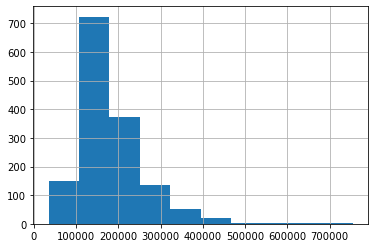

In [5]:
Y.hist()

### Data is positively skewed. To make it more normally distributed we take its logarithmic.

<AxesSubplot:>

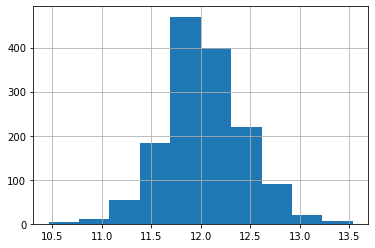

In [6]:
Y = np.log(Y)
Y.hist()

In [7]:
# Fitting our model and performing hyperparameter tuning on it.
X_train, X_cv, Y_train, Y_cv = tts(X, Y, test_size = 0.2, random_state = 0)

lr1 = Ridge(normalize = True, random_state = 0)

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10, 30, 100, 300, 1000]}

grid_search = GridSearchCV(estimator = lr1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   33.3s finished


GridSearchCV(cv=3, estimator=Ridge(normalize=True, random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10, 30, 100,
                                   300, 1000]},
             verbose=2)

In [8]:
grid_search.best_params_

{'alpha': 0.3}

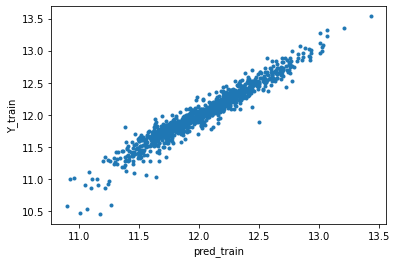

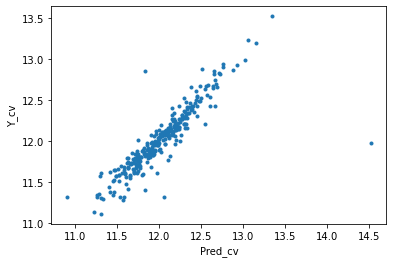

In [13]:
pred_train1 = grid_search.predict(X_train)
pred_cv1 = grid_search.predict(X_cv)

plt.plot(pred_train1, Y_train, '.')
plt.xlabel("pred_train")
plt.ylabel("Y_train")
plt.show()

plt.plot(pred_cv1, Y_cv, '.')
plt.xlabel("Pred_cv")
plt.ylabel("Y_cv")
plt.show()

### We can also see the error we made on predicting crossvalidation set using RMSE error metrics.

In [15]:
J_train = (1/(1*len(pred_train1)))*(((pred_train1 - Y_train)**2).mean(axis = 0))
J_cv = (1/(1*len(pred_cv1)))*(((pred_cv1 - Y_cv)**2).mean(axis = 0))

import math
J_train = math.sqrt(J_train)
J_cv = math.sqrt(J_cv)
print("The RMSE error in predicting the training examples is:", J_train)
print("The RMSE error in predicting the cross-validation examples is:", J_cv)

The RMSE error in predicting the training examples is: 0.003096767320147874
The RMSE error in predicting the cross-validation examples is: 0.011784802456380045


### We predict our test data SalesPrice using our this model

In [17]:
pred_test = grid_search.predict(X_test)

pred_test = np.exp(pred_test)
id_ = np.array(test['Id'])
    
result = pd.DataFrame(data = [id_, pred_test], index = ['Id', 'SalePrice'])
result = result.transpose()
result.to_csv(r'C:\Users\hp\Desktop\house price\New folder\jupiter_notebook\result_ridge.csv', index = False)

### Our model showed around 0.156 of RMSE error on submitting on kaggle.